In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.decomposition import PCA

In [16]:
dfg = pd.read_csv('wat-r14-good.csv')
dfm = pd.read_csv('wat-r14-mals.csv')

In [17]:
dfg.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,824,0,3,0xe0f80,0,0,3,2,8,0,0,30,14,800,8,31,36,1,1,1
1,862,4,0,0xe0f80,3,0,0,4,16,30,14,0,0,858,8,30,36,1,1,1
2,863,4,0,0xe0f80,3,1,1,4,16,30,14,0,0,858,8,29,36,1,1,1
3,864,4,0,0xe0f80,3,2,1,4,16,30,14,0,0,858,8,28,36,1,1,1
4,865,4,0,0xe0f80,3,3,1,4,16,30,14,0,0,858,8,27,36,1,1,1


In [18]:
dfm.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,31,0,4,0xecf40,1,0,3,2,8,29,13,30,14,23,1,49,59,7,7,0
1,70,4,0,0xecf40,2,0,3,2,8,30,14,29,13,66,1,45,59,6,7,0
2,71,4,0,0xecf40,3,0,0,4,16,30,14,1,1,66,1,44,59,5,7,0
3,72,4,0,0xecf40,3,1,1,4,16,30,14,1,1,66,1,43,59,4,7,0
4,73,4,0,0xecf40,3,2,1,4,16,30,14,1,1,66,1,42,59,3,7,0


In [19]:
df = dfg.append(dfm, ignore_index=True)

In [20]:
df.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,824,0,3,0xe0f80,0,0,3,2,8,0,0,30,14,800,8,31,36,1,1,1
1,862,4,0,0xe0f80,3,0,0,4,16,30,14,0,0,858,8,30,36,1,1,1
2,863,4,0,0xe0f80,3,1,1,4,16,30,14,0,0,858,8,29,36,1,1,1
3,864,4,0,0xe0f80,3,2,1,4,16,30,14,0,0,858,8,28,36,1,1,1
4,865,4,0,0xe0f80,3,3,1,4,16,30,14,0,0,858,8,27,36,1,1,1


In [21]:
df = df.sort_values('time')

In [22]:
df.head(50)

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
16852,31,0,4,0xecf40,1,0,3,2,8,29,13,30,14,23,1,49,59,7,7,0
16853,70,4,0,0xecf40,2,0,3,2,8,30,14,29,13,66,1,45,59,6,7,0
16854,71,4,0,0xecf40,3,0,0,4,16,30,14,1,1,66,1,44,59,5,7,0
16855,72,4,0,0xecf40,3,1,1,4,16,30,14,1,1,66,1,43,59,4,7,0
16856,73,4,0,0xecf40,3,2,1,4,16,30,14,1,1,66,1,42,59,3,7,0
16857,74,4,0,0xecf40,3,3,1,4,16,30,14,1,1,66,1,41,59,2,7,0
16858,78,4,0,0xecf40,3,4,2,4,16,30,14,1,1,66,1,35,59,1,7,0
16859,251,0,3,0xecf80,0,0,3,2,8,1,1,30,14,231,4,19,28,1,1,0
16860,288,4,0,0xecf80,3,0,0,4,17,30,14,1,1,284,4,16,28,5,5,0
16861,289,4,0,0xecf80,3,1,1,4,17,30,14,1,1,284,4,15,28,4,5,0


In [23]:
df.to_csv('wat-r14-pkt.csv',index=False)

In [24]:
df = pd.read_csv("wat-r14-pkt.csv")
df

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,31,0,4,0xecf40,1,0,3,2,8,29,13,30,14,23,1,49,59,7,7,0
1,70,4,0,0xecf40,2,0,3,2,8,30,14,29,13,66,1,45,59,6,7,0
2,71,4,0,0xecf40,3,0,0,4,16,30,14,1,1,66,1,44,59,5,7,0
3,72,4,0,0xecf40,3,1,1,4,16,30,14,1,1,66,1,43,59,4,7,0
4,73,4,0,0xecf40,3,2,1,4,16,30,14,1,1,66,1,42,59,3,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33481,3250537,4,0,0x27780,3,1,1,4,16,30,14,0,0,3250532,10017,29,39,1,1,1
33482,3250538,4,0,0x27780,3,2,1,4,16,30,14,0,0,3250532,10017,28,39,1,1,1
33483,3250539,4,0,0x27780,3,3,1,4,16,30,14,0,0,3250532,10017,27,39,1,1,1
33484,3250543,4,0,0x27780,3,4,2,4,16,30,14,0,0,3250532,10017,22,39,1,1,1


In [25]:
df.corr()

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
time,1.000000,-0.038706,0.057431,0.044084,0.008231,-0.012521,-0.035961,-0.038043,0.014000,0.007144,0.034951,0.032957,1.000000,0.982170,-0.108138,-0.191489,-0.388719,-0.466008,0.094259
outport,-0.038706,1.000000,-0.697226,-0.377117,-0.025273,0.038476,0.827792,0.840161,0.362808,0.383071,-0.908910,-0.922702,-0.038697,-0.038843,0.206662,0.014522,-0.025569,0.054082,-0.010058
inport,0.057431,-0.697226,1.000000,0.162521,-0.096008,0.146164,-0.674255,-0.728916,-0.356210,-0.408586,0.677870,0.668178,0.057423,0.060439,-0.171527,-0.049632,-0.041765,-0.113670,0.005731
packet_type,0.044084,-0.377117,0.162521,1.000000,0.268813,-0.409246,-0.343596,-0.353785,0.083441,0.082253,0.223164,0.240342,0.044083,0.044891,-0.081212,0.002196,0.000683,-0.025655,0.011184
flit_id,0.008231,-0.025273,-0.096008,0.268813,1.000000,-0.007677,0.207056,0.171440,-0.010732,-0.008672,-0.112486,-0.098769,0.008227,0.006792,-0.028207,0.020949,-0.026766,0.021629,0.001451
flit_type,-0.012521,0.038476,0.146164,-0.409246,-0.007677,1.000000,-0.315226,-0.261003,0.016338,0.013203,0.171250,0.150368,-0.012525,-0.010341,-0.030170,0.033814,-0.006370,0.004833,-0.002209
vnet,-0.035961,0.827792,-0.674255,-0.343596,0.207056,-0.315226,1.000000,0.974615,0.284961,0.302040,-0.924185,-0.919496,-0.035954,-0.037640,0.179320,0.008856,-0.023888,0.058405,-0.009914
vc,-0.038043,0.840161,-0.728916,-0.353785,0.171440,-0.261003,0.974615,1.000000,0.311296,0.331008,-0.920006,-0.914765,-0.038035,-0.040048,0.179278,0.010984,-0.015531,0.069229,-0.009375
src_ni,0.014000,0.362808,-0.356210,0.083441,-0.010732,0.016338,0.284961,0.311296,1.000000,0.995357,-0.317864,-0.323690,0.014007,0.020303,0.122034,0.055984,-0.048700,-0.005890,-0.004250
src_router,0.007144,0.383071,-0.408586,0.082253,-0.008672,0.013203,0.302040,0.331008,0.995357,1.000000,-0.340206,-0.345140,0.007151,0.013582,0.128095,0.067646,-0.039350,0.003794,-0.004711


In [26]:
train_X = df.drop(columns=['packet_address','time','target','pkt_count_all','pkt_count_all','pkt_max_all','src_router','src_ni'])

In [27]:
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count,pkt_max
0,0,4,1,0,3,2,8,30,14,23,1,7,7
1,4,0,2,0,3,2,8,29,13,66,1,6,7
2,4,0,3,0,0,4,16,1,1,66,1,5,7
3,4,0,3,1,1,4,16,1,1,66,1,4,7
4,4,0,3,2,1,4,16,1,1,66,1,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33481,4,0,3,1,1,4,16,0,0,3250532,10017,1,1
33482,4,0,3,2,1,4,16,0,0,3250532,10017,1,1
33483,4,0,3,3,1,4,16,0,0,3250532,10017,1,1
33484,4,0,3,4,2,4,16,0,0,3250532,10017,1,1


In [28]:
#normalization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.967742,0.933333,0.000000,0.000000,0.30,0.3
1,1.0,0.0,0.333333,0.00,1.000000,0.0,0.000000,0.935484,0.866667,0.000013,0.000000,0.25,0.3
2,1.0,0.0,0.500000,0.00,0.000000,1.0,0.727273,0.032258,0.066667,0.000013,0.000000,0.20,0.3
3,1.0,0.0,0.500000,0.25,0.333333,1.0,0.727273,0.032258,0.066667,0.000013,0.000000,0.15,0.3
4,1.0,0.0,0.500000,0.50,0.333333,1.0,0.727273,0.032258,0.066667,0.000013,0.000000,0.10,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33481,1.0,0.0,0.500000,0.25,0.333333,1.0,0.727273,0.000000,0.000000,0.999704,0.972710,0.00,0.0
33482,1.0,0.0,0.500000,0.50,0.333333,1.0,0.727273,0.000000,0.000000,0.999704,0.972710,0.00,0.0
33483,1.0,0.0,0.500000,0.75,0.333333,1.0,0.727273,0.000000,0.000000,0.999704,0.972710,0.00,0.0
33484,1.0,0.0,0.500000,1.00,0.666667,1.0,0.727273,0.000000,0.000000,0.999704,0.972710,0.00,0.0


In [29]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,1.000000,-0.697226,-0.377117,-0.025273,0.038476,0.827792,0.840161,-0.908910,-0.922702,-0.038697,-0.038843,-0.025569,0.054082,-0.010058
1,-0.697226,1.000000,0.162521,-0.096008,0.146164,-0.674255,-0.728916,0.677870,0.668178,0.057423,0.060439,-0.041765,-0.113670,0.005731
2,-0.377117,0.162521,1.000000,0.268813,-0.409246,-0.343596,-0.353785,0.223164,0.240342,0.044083,0.044891,0.000683,-0.025655,0.011184
3,-0.025273,-0.096008,0.268813,1.000000,-0.007677,0.207056,0.171440,-0.112486,-0.098769,0.008227,0.006792,-0.026766,0.021629,0.001451
4,0.038476,0.146164,-0.409246,-0.007677,1.000000,-0.315226,-0.261003,0.171250,0.150368,-0.012525,-0.010341,-0.006370,0.004833,-0.002209
5,0.827792,-0.674255,-0.343596,0.207056,-0.315226,1.000000,0.974615,-0.924185,-0.919496,-0.035954,-0.037640,-0.023888,0.058405,-0.009914
6,0.840161,-0.728916,-0.353785,0.171440,-0.261003,0.974615,1.000000,-0.920006,-0.914765,-0.038035,-0.040048,-0.015531,0.069229,-0.009375
7,-0.908910,0.677870,0.223164,-0.112486,0.171250,-0.924185,-0.920006,1.000000,0.998176,0.034943,0.036111,0.021778,-0.061352,0.007132
8,-0.922702,0.668178,0.240342,-0.098769,0.150368,-0.919496,-0.914765,0.998176,1.000000,0.032949,0.033917,0.026702,-0.055082,0.005704
9,-0.038697,0.057423,0.044083,0.008227,-0.012525,-0.035954,-0.038035,0.034943,0.032949,1.000000,0.982170,-0.388720,-0.466008,0.094259


In [30]:
train_Y = df['target']

In [31]:
train_Y

0        0
1        0
2        0
3        0
4        0
        ..
33481    1
33482    1
33483    1
33484    1
33485    1
Name: target, Length: 33486, dtype: int64

In [32]:
pca = PCA(0.95)

In [33]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
principal_components = pca.transform(train_X)
principal_components

array([[-1.02995989,  0.86515792,  0.51782423, -0.21900336, -0.37598781,
        -0.3265239 ],
       [-0.25175336,  0.90802019,  0.75627691, -0.32683183,  0.53954098,
         0.02944253],
       [ 1.24110034,  0.75342934,  0.09547914,  0.58754932, -0.05769358,
        -0.02743534],
       ...,
       [ 1.26501463, -0.70322224, -0.18096024, -0.13624716, -0.00619815,
        -0.02662793],
       [ 1.25688898, -0.70029853, -0.23279526, -0.53923973,  0.00388663,
        -0.01904221],
       [-0.73120758, -0.57009756,  0.78587588, -0.30273401, -0.35695481,
        -0.01779896]])

In [35]:
pca.explained_variance_ratio_

array([0.62296609, 0.11241238, 0.09266222, 0.07009408, 0.04788003,
       0.02952176])

In [36]:
features = range(pca.n_components_)

Text(0, 0.5, 'Variance')

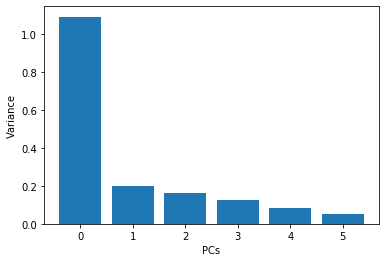

In [37]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [38]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5
0,-1.029960,0.865158,0.517824,-0.219003,-0.375988,-0.326524
1,-0.251753,0.908020,0.756277,-0.326832,0.539541,0.029443
2,1.241100,0.753429,0.095479,0.587549,-0.057694,-0.027435
3,1.233022,0.752370,0.044064,0.184141,-0.048563,-0.019775
4,1.244395,0.730321,-0.146092,0.037724,-0.052605,-0.023768
...,...,...,...,...,...,...
33481,1.242361,-0.667092,0.200189,0.155753,-0.000022,-0.018494
33482,1.253688,-0.685157,0.009615,0.009753,-0.003110,-0.022561
33483,1.265015,-0.703222,-0.180960,-0.136247,-0.006198,-0.026628
33484,1.256889,-0.700299,-0.232795,-0.539240,0.003887,-0.019042


In [39]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,target
0,-1.029960,0.865158,0.517824,-0.219003,-0.375988,-0.326524,0
1,-0.251753,0.908020,0.756277,-0.326832,0.539541,0.029443,0
2,1.241100,0.753429,0.095479,0.587549,-0.057694,-0.027435,0
3,1.233022,0.752370,0.044064,0.184141,-0.048563,-0.019775,0
4,1.244395,0.730321,-0.146092,0.037724,-0.052605,-0.023768,0
...,...,...,...,...,...,...,...
33481,1.242361,-0.667092,0.200189,0.155753,-0.000022,-0.018494,1
33482,1.253688,-0.685157,0.009615,0.009753,-0.003110,-0.022561,1
33483,1.265015,-0.703222,-0.180960,-0.136247,-0.006198,-0.026628,1
33484,1.256889,-0.700299,-0.232795,-0.539240,0.003887,-0.019042,1


In [40]:
final_df.corr()

,0,1,2,3,4,5,target
0,1.000000e+00,-1.859794e-15,-6.076736e-16,-5.734729e-16,1.912905e-15,-6.755407e-15,-0.009255
1,-1.859794e-15,1.000000e+00,-7.556691e-16,-2.249561e-16,-3.284720e-16,4.123772e-16,-0.053678
2,-6.076736e-16,-7.556691e-16,1.000000e+00,4.851846e-18,8.991920e-16,-2.083155e-15,0.001672
3,-5.734729e-16,-2.249561e-16,4.851846e-18,1.000000e+00,-9.435510e-16,-9.497496e-17,0.001079
4,1.912905e-15,-3.284720e-16,8.991920e-16,-9.435510e-16,1.000000e+00,1.011686e-15,0.002319
5,-6.755407e-15,4.123772e-16,-2.083155e-15,-9.497496e-17,1.011686e-15,1.000000e+00,0.007049
target,-9.255405e-03,-5.367848e-02,1.671840e-03,1.079102e-03,2.319153e-03,7.048568e-03,1.000000


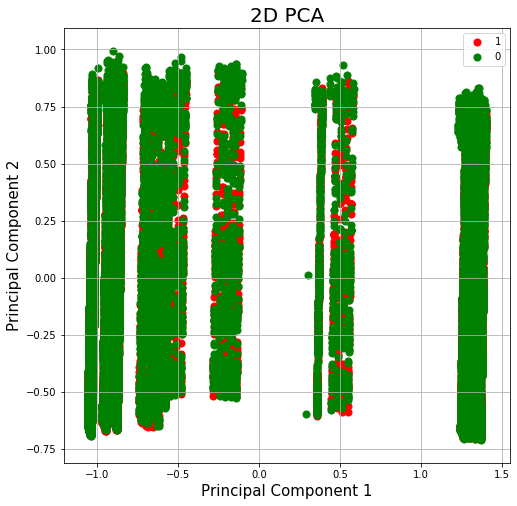

In [41]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [42]:
dup_df = df.drop(columns=['packet_address','time'])
dup_df

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,0,4,1,0,3,2,8,29,13,30,14,23,1,49,59,7,7,0
1,4,0,2,0,3,2,8,30,14,29,13,66,1,45,59,6,7,0
2,4,0,3,0,0,4,16,30,14,1,1,66,1,44,59,5,7,0
3,4,0,3,1,1,4,16,30,14,1,1,66,1,43,59,4,7,0
4,4,0,3,2,1,4,16,30,14,1,1,66,1,42,59,3,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33481,4,0,3,1,1,4,16,30,14,0,0,3250532,10017,29,39,1,1,1
33482,4,0,3,2,1,4,16,30,14,0,0,3250532,10017,28,39,1,1,1
33483,4,0,3,3,1,4,16,30,14,0,0,3250532,10017,27,39,1,1,1
33484,4,0,3,4,2,4,16,30,14,0,0,3250532,10017,22,39,1,1,1


In [43]:
dup_df[dup_df.duplicated()].shape

(0, 18)

In [44]:
dup_df[dup_df.duplicated()].count()

outport          0
inport           0
packet_type      0
flit_id          0
flit_type        0
vnet             0
vc               0
src_ni           0
src_router       0
dst_ni           0
dst_router       0
enq_time         0
pkt_chuck        0
pkt_count_all    0
pkt_max_all      0
pkt_count        0
pkt_max          0
target           0
dtype: int64

In [45]:
seed = 7
np.random.seed(seed)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.32, random_state=seed, shuffle=True)

In [47]:
model = Sequential()

In [48]:
n_cols = train_X.shape[1]
n_cols

13

In [49]:
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [50]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)

In [51]:
model.fit(x_train, y_train, epochs=50, validation_split=0.4)

Train on 13662 samples, validate on 9108 samples
Epoch 1/50
13662/13662 [==============================] - 2s 134us/step - loss: 0.2499 - accuracy: 0.4986 - val_loss: 0.2498 - val_accuracy: 0.4969
Epoch 2/50
13662/13662 [==============================] - 1s 103us/step - loss: 0.2497 - accuracy: 0.5049 - val_loss: 0.2497 - val_accuracy: 0.5009
Epoch 3/50
13662/13662 [==============================] - 1s 100us/step - loss: 0.2495 - accuracy: 0.5062 - val_loss: 0.2496 - val_accuracy: 0.5075
Epoch 4/50
13662/13662 [==============================] - 1s 104us/step - loss: 0.2494 - accuracy: 0.5141 - val_loss: 0.2494 - val_accuracy: 0.5149
Epoch 5/50
13662/13662 [==============================] - 1s 107us/step - loss: 0.2490 - accuracy: 0.5268 - val_loss: 0.2490 - val_accuracy: 0.5194
Epoch 6/50
13662/13662 [==============================] - 1s 104us/step - loss: 0.2486 - accuracy: 0.5397 - val_loss: 0.2487 - val_accuracy: 0.5384
Epoch 7/50
13662/13662 [==============================] - 2s 12

In [52]:
scores = model.evaluate(x_test, y_test, verbose=0)

In [53]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.82%


In [54]:
dff = pd.read_csv('wat-r14-pkt.csv',nrows=500)

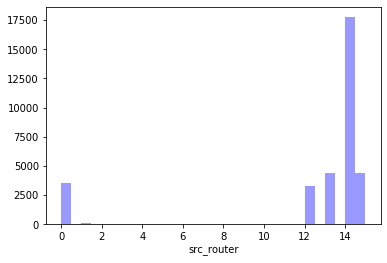

In [55]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

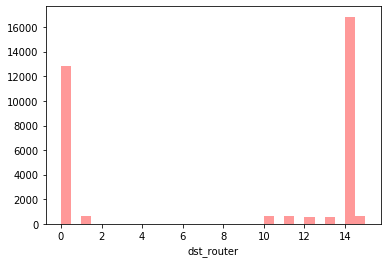

In [56]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

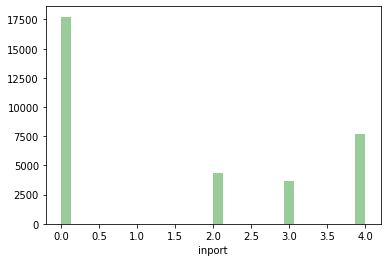

In [57]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

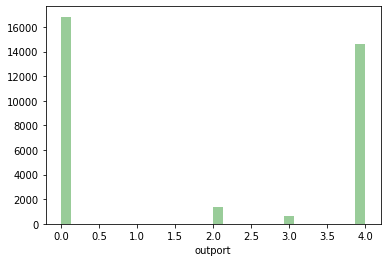

In [58]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

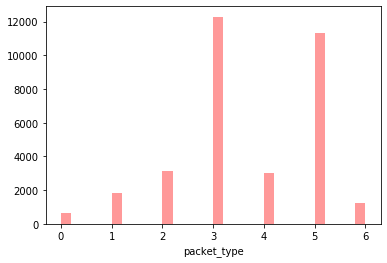

In [59]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')